In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/games.csv")

In [5]:
df['home_field_win'] = (df['HomeScore'] > df['AwayScore']).apply(lambda x: int(x))

In [6]:
df.head(5)

,Year,Week,HomeTeam,AwayTeam,HomeId,AwayId,HomeScore,AwayScore,home_field_win
0,2018,1,UMass,Duquesne,113,2184,63,15,1
1,2018,1,Rice,Prairie View,242,2504,31,28,1
2,2018,1,Colorado State,Hawai'i,36,62,34,43,0
3,2018,1,New Mexico State,Wyoming,166,2751,7,29,0
4,2018,1,UConn,UCF,41,2116,17,56,0


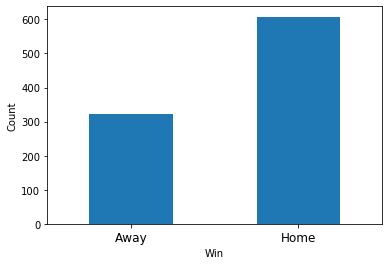

In [16]:
fig, ax = plt.subplots()

(df
    .groupby('home_field_win')
    .size()).plot.bar(ax = ax)

ax.set_xticklabels(['Away','Home'], rotation = 0, fontsize = 12);
ax.set_xlabel("Win")
ax.set_ylabel("Count")

plt.show()

Wow, it seems home field advantage is real!
Not really sure how much there is to look at here tbh, I didn't scrape that much data.

In [24]:
all_scores = pd.concat([df['HomeScore'],df['AwayScore']])
print(f"Maximum score of all 2018 games was {all_scores.max()}.")
print(f"Minimum score of all 2018 games was {all_scores.min()}.")
print(f"Mean score of all 2018 games was {all_scores.mean()}.")
print(f"Median score of all 2018 games was {all_scores.median()}.")

Maximum score of all 2018 games was 79.
Minimum score of all 2018 games was 0.
Mean score of all 2018 games was 28.694833153928958.
Median score of all 2018 games was 27.0.


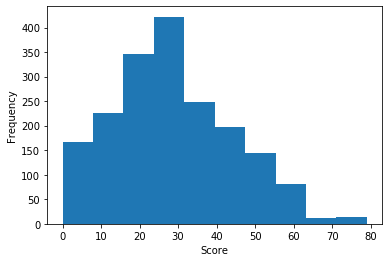

In [33]:
fig, ax = plt.subplots()

ax.hist(all_scores)
ax.set_xlabel("Score")
ax.set_ylabel("Frequency")

plt.show()

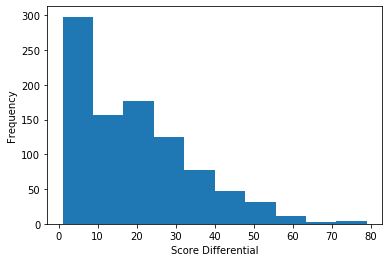

In [39]:
fig, ax = plt.subplots()

ax.hist(np.abs(df['HomeScore'] - df['AwayScore']))
ax.set_xlabel("Score Differential")
ax.set_ylabel("Frequency")

plt.show()

That's kind of funny, we see a huge number of games decided by either 1 field goal or 1 touchdown. That quantization becomes much more clear after a log transform.

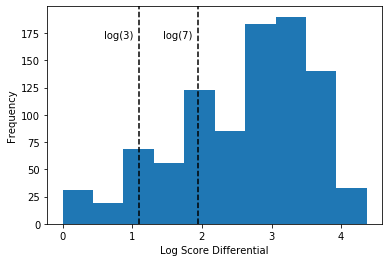

In [55]:
fig, ax = plt.subplots()

ax.hist(np.log(np.abs(df['HomeScore'] - df['AwayScore'])))
ax.set_xlabel("Log Score Differential")
ax.set_ylabel("Frequency")

ax.axvline(np.log(3),color = 'k', linestyle = '--')

ax.annotate('log(3)',
           xy = (np.log(3)-0.5,170))

ax.axvline(np.log(7),color = 'k', linestyle = '--')

ax.annotate('log(7)',
           xy = (np.log(7)-0.5,170))

plt.show()